In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Boston.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

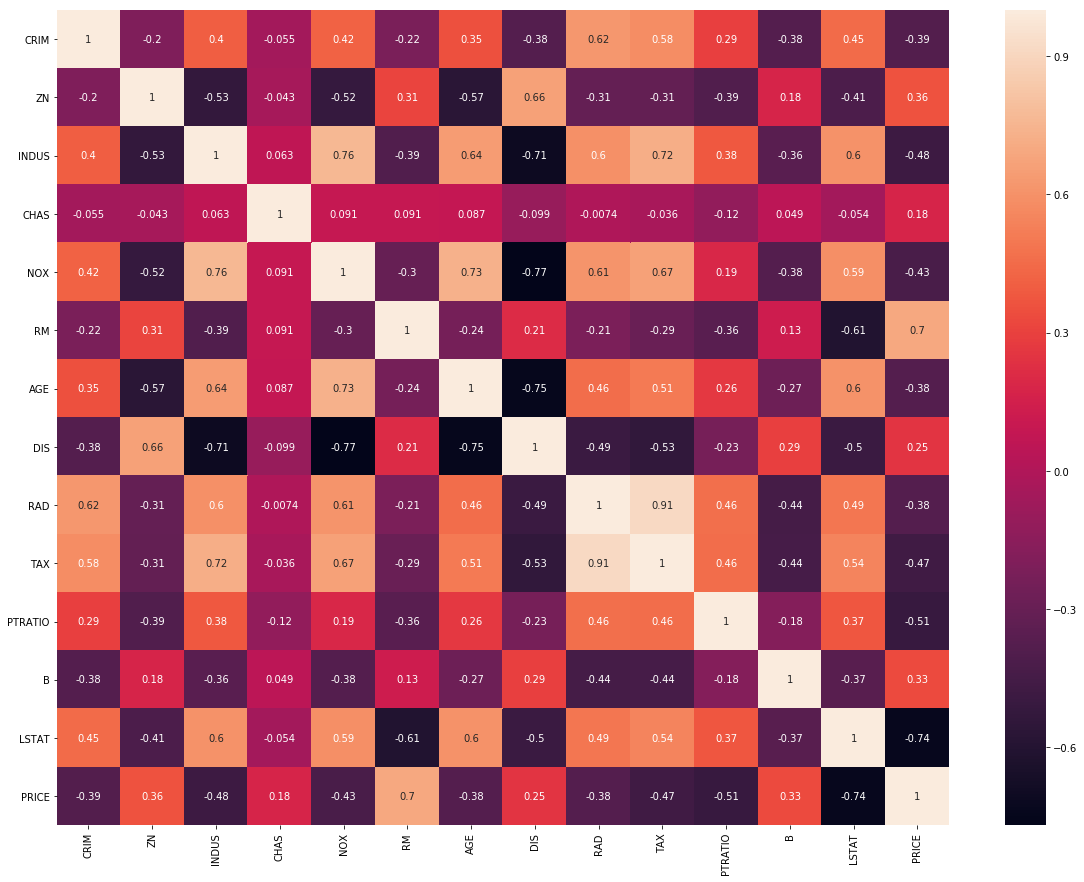

In [10]:
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, 
            annot = True, annot_kws={'size':10})
heat_map=plt.gcf()
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [17]:
feature_col = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

x=data[feature_col]


x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [19]:
y = data['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [20]:
print(y.shape)

(506,)


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 13)
(379,)
(127, 13)
(127,)


In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print(linreg.intercept_)
print(linreg.coef_)

45.23641584605678
[-1.13256952e-01  5.70869807e-02  3.87621062e-02  2.43279795e+00
 -2.12706290e+01  2.86930027e+00  7.02105327e-03 -1.47118312e+00
  3.05187368e-01 -1.06649888e-02 -9.97404179e-01  6.39833822e-03
 -5.58425480e-01]


In [26]:
list(zip(feature_col,linreg.coef_))

[('CRIM', -0.11325695150325495),
 ('ZN', 0.05708698067396617),
 ('INDUS', 0.03876210617056122),
 ('CHAS', 2.432797945480972),
 ('NOX', -21.27062900549677),
 ('RM', 2.8693002671025134),
 ('AGE', 0.007021053271753175),
 ('DIS', -1.4711831191290996),
 ('RAD', 0.3051873675841802),
 ('TAX', -0.010664988782812168),
 ('PTRATIO', -0.9974041787728996),
 ('B', 0.0063983382249389485),
 ('LSTAT', -0.5584254800083361)]

In [29]:
y_pred=linreg.predict(x_test)
y_pred[:5]

array([32.37355169, 27.95629215, 18.07265446, 21.63752354, 18.92899165])

In [30]:
y_test[:5]

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: PRICE, dtype: float64

In [31]:
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score


In [32]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.678607638226899


In [33]:
r2_score(y_test,y_pred)

0.7790257749137307

In [38]:
x=data[['RM','LSTAT']]
x.head()
#x = np.array(x).reshape(-1,1)



,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [39]:
y =data['PRICE']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 1)

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(379, 2)
(379,)
(127, 2)
(127,)


In [43]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print(linreg.intercept_)
print(linreg.coef_)

4.6642924298519866
[ 4.20479437 -0.66663768]


In [45]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.678607638226899


In [46]:
print(r2_score(y_test,y_pred))

0.7790257749137307


In [47]:
print(y_pred[:5])

[32.37355169 27.95629215 18.07265446 21.63752354 18.92899165]


In [48]:
print(y_test[:5])

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
Name: PRICE, dtype: float64


AttributeError: module 'matplotlib.pyplot' has no attribute 'linreg'